In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [5]:
from glob import glob

In [12]:
# Load the dataset
file_path1 = glob(f"datasets/v3/day*.csv")
file_path2 = glob(f"datasets/v3/poison*.csv")

In [19]:
file_path2[0][18:]

'14.csv'

In [17]:
file_path1 = sorted(file_path1, key=lambda x: int(x[15:].split('.')[0]))

In [18]:
file_path1

['datasets/v3/day8.csv',
 'datasets/v3/day9.csv',
 'datasets/v3/day10.csv',
 'datasets/v3/day11.csv',
 'datasets/v3/day12.csv',
 'datasets/v3/day13.csv',
 'datasets/v3/day14.csv']

In [20]:
file_path2 = sorted(file_path2, key=lambda x: int(x[18:].split('.')[0]))
file_path2

['datasets/v3/poison8.csv',
 'datasets/v3/poison9.csv',
 'datasets/v3/poison10.csv',
 'datasets/v3/poison11.csv',
 'datasets/v3/poison12.csv',
 'datasets/v3/poison13.csv',
 'datasets/v3/poison14.csv']

In [21]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [23]:
def preprocess_data(df):
    # Convert 'Weapon Detected' to binary (1 for 'Yes', 0 for 'No')
    #df['Weapon Detected'] = df['Weapon Detected'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Encode 'Timestamp' using LabelEncoder
    label_encoder = LabelEncoder()
    df['Hour'] = label_encoder.fit_transform(df['Hour'])
    
    week_label = LabelEncoder()
    df['Weekday/Weekend'] = week_label.fit_transform(df['Weekday/Weekend'])

    # Extract state and action data
    state_data = df[['Hour', 'Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [24]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
for d in data1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [7]:
state_data_N

array([[  0,   0,   0,   0],
       [  1,   0,   0,   0],
       [  2,   0,   0,   0],
       ...,
       [141,   1,   4,   0],
       [142,   1,   4,   0],
       [143,   1,   4,   0]])

In [27]:
state_data_N[6]

array([[  0,   1,   4,   0],
       [  1,   1,   4,   0],
       [  2,   1,   4,   0],
       [  3,   1,   4,   0],
       [  4,   1,   4,   0],
       [  5,   1,   4,   0],
       [  6,   1,   4,   0],
       [  7,   1,   4,   0],
       [  8,   1,   4,   0],
       [  9,   1,   4,   0],
       [ 10,   1,   4,   0],
       [ 11,   1,   4,   0],
       [ 12,   1,   4,   0],
       [ 13,   1,   4,   0],
       [ 14,   1,   4,   0],
       [ 15,   1,   4,   0],
       [ 16,   1,   4,   0],
       [ 17,   1,   4,   0],
       [ 18,   1,   4,   0],
       [ 19,   1,   4,   0],
       [ 20,   1,   4,   0],
       [ 21,   1,   4,   0],
       [ 22,   1,   4,   0],
       [ 23,   1,   4,   0],
       [ 24,   1,   4,   0],
       [ 25,   1,   4,   0],
       [ 26,   1,   4,   0],
       [ 27,   1,   4,   0],
       [ 28,   1,   4,   0],
       [ 29,   1,   4,   0],
       [ 30,   1,   4,   0],
       [ 31,   1,   4,   0],
       [ 32,   1,   4,   0],
       [ 33,   1,   4,   0],
       [ 34,  

In [66]:
len(state_data_N)

2016

In [8]:
actions_N

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
for d in data2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [29]:
state_data_P

[array([[  0,   0,   0,   0],
        [  1,   0,   0,   0],
        [  2,   0,   0,   0],
        [  3,   0,   0,   0],
        [  4,   0,   0,   0],
        [  5,   0,   0,   0],
        [  6,   0,   0,   0],
        [  7,   0,   0,   0],
        [  8,   0,   0,   0],
        [  9,   0,   0,   0],
        [ 10,   0,   0,   0],
        [ 11,   0,   0,   0],
        [ 12,   0,   0,   0],
        [ 13,   0,   0,   0],
        [ 14,   0,   0,   0],
        [ 15,   0,   0,   0],
        [ 16,   0,   0,   0],
        [ 17,   0,   0,   0],
        [ 18,   0,   0,   0],
        [ 19,   0,   0,   0],
        [ 20,   0,   0,   0],
        [ 21,   0,   0,   0],
        [ 22,   0,   0,   0],
        [ 23,   0,   0,   0],
        [ 24,   0,   0,   0],
        [ 25,   0,   0,   0],
        [ 26,   0,   0,   0],
        [ 27,   0,   0,   0],
        [ 28,   0,   0,   0],
        [ 29,   0,   0,   0],
        [ 30,   0,   0,   0],
        [ 31,   0,   0,   0],
        [ 32,   0,   0,   0],
        [ 

In [31]:
#np.zeros(state_data_N[0].shape[1])

array([0., 0., 0., 0.])

In [108]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = self.actions_data_N[self.index][self.current_step]
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        correct_action = self.actions_data_P[self.index][self.current_step]
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [109]:
# Q-Learning parameters
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 1.0
exploration_decay = 0.995
exploration_min = 0.01
total_episodes = 1000  # Number of episodes for training
state_discretizer = (10, 2, 2, 2)  # Tuple representing discrete bins for each state feature

In [110]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [111]:
env.index

0

In [112]:
# Initialize Q-table using a defaultdict for easy default values
q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [113]:
q_table

defaultdict(<function __main__.<lambda>()>, {})

In [114]:
# Helper function to discretize continuous states
def discretize_state(state):
    """Convert continuous state into a discrete tuple."""
    return tuple(int(state[i] // (1 / state_discretizer[i])) for i in range(len(state)))

In [115]:
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [116]:
# Continuous Q-learning training loop
poison = False
avg_reward = []
suc_rate = []
epsilon = []
end_of_ep = False
for episode in range(total_episodes):
    if end_of_ep == False:
        state = env.reset_N() if poison == False else env.reset_P()
        state = discretize_state(state)
        done = False
    episode_reward = 0

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < exploration_rate:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit the best known action
        
        # Take the action in the environment
        next_state, reward, done, _ = env.step_N(action) if poison == False else env.step_P(action)
        next_state = discretize_state(next_state)
        
        # Update Q-value using Q-learning formula
        best_future_q = max(q_table[next_state]) if not done else 0
        q_table[state][action] += learning_rate * (reward + discount_factor * best_future_q - q_table[state][action])
        
        # Update state and metrics
        state = next_state
        episode_reward += reward
        #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
        action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct
        
    # Track episode reward
    reward_history.append(episode_reward)

    # Decay exploration rate
    exploration_rate = max(exploration_min, exploration_rate * exploration_decay)
    epsilon.append(exploration_rate)
    
    if episode >= 500:
        poison = True
    if episode > 900:
        poison = False
    
    # Output training progress
    if episode % 2 == 0:
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.2f}")

self.index = 1
Episode 0: Avg Reward = 19.00, Success Rate = 0.50
self.index = 3
self.index = 5
Episode 2: Avg Reward = 61.00, Success Rate = 0.47
self.index = 0
self.index = 2
Episode 4: Avg Reward = 11.00, Success Rate = 0.39
self.index = 4
self.index = 6
Episode 6: Avg Reward = 79.43, Success Rate = 0.44
self.index = 0
self.index = 2
Episode 8: Avg Reward = 49.11, Success Rate = 0.39
self.index = 4
self.index = 6
Episode 10: Avg Reward = 80.91, Success Rate = 0.41
self.index = 0
self.index = 2
Episode 12: Avg Reward = 59.00, Success Rate = 0.39
self.index = 4
self.index = 6
Episode 14: Avg Reward = 79.00, Success Rate = 0.39
self.index = 0
self.index = 2
Episode 16: Avg Reward = 62.24, Success Rate = 0.36
self.index = 4
self.index = 6
Episode 18: Avg Reward = 90.00, Success Rate = 0.41
self.index = 0
self.index = 2
Episode 20: Avg Reward = 77.81, Success Rate = 0.37
self.index = 4
self.index = 6
Episode 22: Avg Reward = 94.91, Success Rate = 0.42
self.index = 0
self.index = 2
Episod

In [117]:
import matplotlib.pyplot as plt

In [120]:
episodes = [x for x in range(0,1000,2)]

No handles with labels found to put in legend.


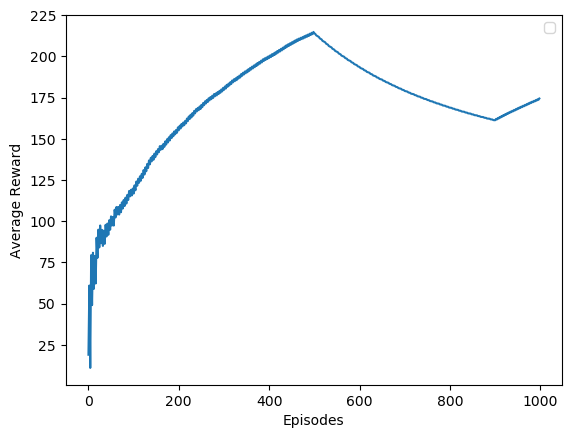

In [123]:
plt.plot(episodes,avg_reward)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.savefig("Avg_poison.png")

No handles with labels found to put in legend.


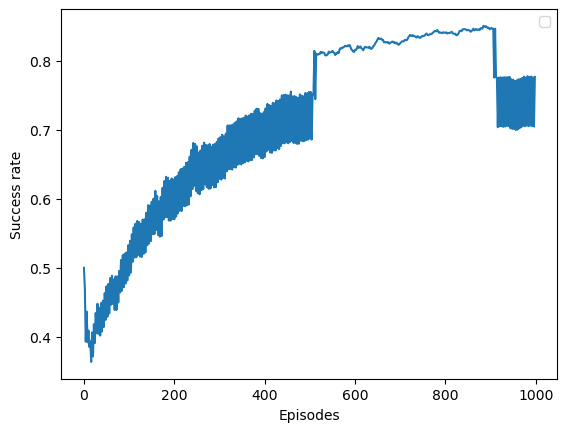

In [124]:
plt.plot(episodes,suc_rate)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
plt.savefig("suc_poison.png")

In [125]:
len(epsilon)

1000

No handles with labels found to put in legend.


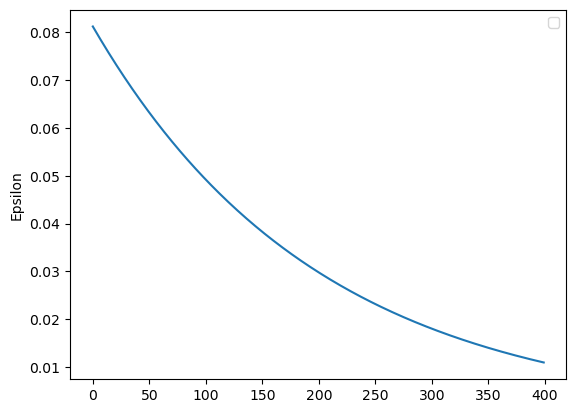

In [129]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
plt.savefig("epsilon_poison.png")

In [56]:
epsilon[500:600]

[0.0811640021330769,
 0.08075818212241151,
 0.08035439121179945,
 0.07995261925574046,
 0.07955285615946175,
 0.07915509187866444,
 0.07875931641927113,
 0.07836551983717477,
 0.07797369223798889,
 0.07758382377679894,
 0.07719590465791494,
 0.07680992513462537,
 0.07642587550895225,
 0.07604374613140748,
 0.07566352740075044,
 0.07528520976374668,
 0.07490878371492794,
 0.0745342397963533,
 0.07416156859737154,
 0.07379076075438468,
 0.07342180695061275,
 0.07305469791585968,
 0.07268942442628039,
 0.07232597730414898,
 0.07196434741762824,
 0.0716045256805401,
 0.0712465030521374,
 0.0708902705368767,
 0.07053581918419231,
 0.07018314008827135,
 0.06983222438783,
 0.06948306326589085,
 0.0691356479495614,
 0.06878996970981359,
 0.06844601986126451,
 0.06810378976195819,
 0.0677632708131484,
 0.06742445445908266,
 0.06708733218678724,
 0.0667518955258533,
 0.06641813604822402,
 0.0660860453679829,
 0.06575561514114299,
 0.06542683706543727,
 0.06509970288011008,
 0.06477420436570952,


In [57]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [91.16156166492583, 88.48133165642888],
             (0, 0, 0, 0): [91.27154784104732, 88.52143034257763],
             (19, 0, 0, 0): [91.04949229718942, 88.49138593310467],
             (29, 0, 0, 0): [90.93841890586829, 88.26712503531989],
             (39, 0, 0, 0): [90.83114398540826, 88.35966305840863],
             (49, 0, 0, 0): [90.72795984687136, 88.30241489162998],
             (59, 0, 0, 0): [90.62723461335692, 88.39399966287282],
             (69, 0, 0, 0): [90.52472565439504, 88.51489432200268],
             (79, 0, 0, 0): [90.420706545015, 88.39523769225903],
             (89, 0, 0, 0): [90.3522295755977, 87.79095613415146],
             (99, 0, 0, 0): [90.19016527211195, 88.03987180257656],
             (109, 0, 0, 0): [89.40050732077955, 87.29515578810324],
             (119, 0, 0, 0): [91.6794757049803, 88.92880060146807],
             (129, 0, 0, 0): [91.58366825948409, 89.0338811458372],
        